In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("yelp_labelled.txt")
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['review', 'negative']

yelp_raw.head()

,review,negative
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [29]:
yelp_raw.loc[yelp_raw['negative']==0].head(2)

,review,negative,bad,not good,disappointed,gross,dirty,bad service,rude,nasty,...,vomit,sick,flop,sucks,never,wasn't good,wasted,overpriced,manager,shocked
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
neg_keywords = ['bad', 'not good', 'disappointed', 'gross', 'dirty', 'bad service', 'rude', 'nasty', 'not', 'poor',
                'slow', 'awful', 'undercooked', 'lacked', 'vomit', 'sick', 'flop', 'sucks', 'never', "wasn't good",
                'wasted', 'overpriced', 'poor', 'manager', 'shocked']

pos_keywords = ['good', 'great', 'happy', 'clean', 'fast', 'would', 'polite', 'come back', 'recommend', 'quick',
                'cute', 'yummy', 'beautiful', 'on time', 'flavorful', 'love', 'amazing', 'fav']

yelp_pos = yelp_raw.copy()

for key in neg_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        str(key),
        case=0
    )
    
for key in pos_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_pos[str(key)] = yelp_pos.review.str.contains(
        str(key),
        case=1
    )

In [4]:
yelp_raw['negative'] = (yelp_raw['negative'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [5]:
yelp_pos['negative'] = (yelp_pos['negative'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [5]:
yelp_raw.head()

,review,negative,bad,not good,disappointed,gross,dirty,bad service,rude,nasty,...,vomit,sick,flop,sucks,never,wasn't good,wasted,overpriced,manager,shocked
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Heatmap of DataFrame Correlation Map
The heatmap shows most features are barely correlated with each other, if at all. This demonstrates suitability for the Naive Bayes Classifier Model.

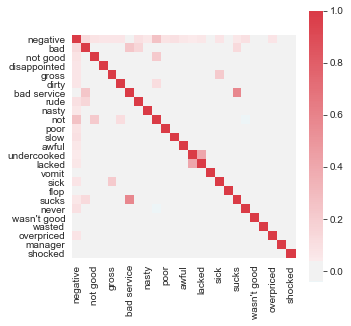

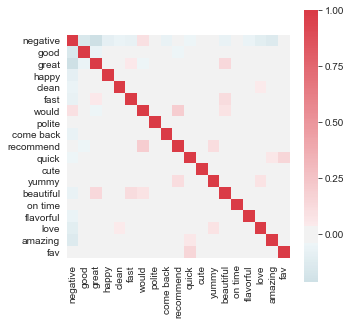

In [6]:

sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(yelp_raw.corr(), square=True, cmap=cmap, center=0)
plt.show()

sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(yelp_pos.corr(), square=True, cmap=cmap, center=0)
plt.show()

In [12]:
data = yelp_raw[neg_keywords]
target = yelp_raw['negative']

data_p = yelp_pos[pos_keywords]
target_p = yelp_pos['negative']

### Run the Model

In [26]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Negative Words: Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

# with positive words
bnb = BernoulliNB()
bnb.fit(data_p, target_p)
y_pred_p = bnb.predict(data_p)
print("\nPositive Words: Number of mislabeled points out of a total {} points : {}".format(
    data_p.shape[0],
    (target != y_pred_p).sum()
))

Negative Words: Number of mislabeled points out of a total 1000 points : 324

Positive Words: Number of mislabeled points out of a total 1000 points : 338


In [25]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('Negative Words:')
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(data_p, target_p, test_size=0.2, random_state=20)
print('\nPositive Words:')
print('With 20% Holdout: ' + str(bnb.fit(X_train_p, y_train_p).score(X_test_p, y_test_p)))
print('Testing on Sample: ' + str(bnb.fit(data_p, target_p).score(data_p, target_p)))

Negative Words:
With 20% Holdout: 0.64
Testing on Sample: 0.676

Positive Words:
With 20% Holdout: 0.655
Testing on Sample: 0.662


### f1 Score

In [24]:
from sklearn import metrics

score = metrics.f1_score(yelp_raw["negative"], y_pred)
print('Negative Words:')
print("Your model achieved an f1-score of " + str(score))

score_p = metrics.f1_score(yelp_pos["negative"], y_pred_p)
print('\nPositive Words:')
print("Your model achieved an f1-score of " + str(score_p))

Negative Words:
Your model achieved an f1-score of 0.5597826086956521

Positive Words:
Your model achieved an f1-score of 0.7325949367088608


### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef
print('Negative Words:')
print("confusion matrix:")
print(confusion_matrix(yelp_raw["negative"], y_pred))

print('\nPositive Words:')
print("confusion matrix:")
print(confusion_matrix(yelp_pos["negative"], y_pred_p))

Negative Words:
confusion matrix:
[[470  30]
 [294 206]]

Positive Words:
confusion matrix:
[[199 301]
 [ 37 463]]


### Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
print('Negative Words:')
print("cross-validation scores:")
print(cross_val_score(bnb, data, target, cv=10))
print(matthews_corrcoef(yelp_raw["negative"], y_pred))


print('\nPositive Words:')
print("cross-validation scores:")
print(cross_val_score(bnb, data_p, target_p, cv=10))
print(matthews_corrcoef(yelp_pos["negative"], y_pred_p))

Negative Words:
cross-validation scores:
[0.71 0.62 0.73 0.65 0.63 0.69 0.72 0.65 0.67 0.64]
0.4144861154561593

Positive Words:
cross-validation scores:
[0.65 0.67 0.65 0.68 0.67 0.61 0.63 0.66 0.62 0.74]
0.3815156289994194


### Sensitivity

In [21]:
# Here we are defining a positive as a FALSE result 
# (since the model is determining whether an e-mail is GENUINE) so we will 
# use that in the calculation instead of 'True':

posco = ((target==True) & (y_pred==True)).sum()
posinco = ((target==True) & (y_pred==False)).sum()
negco = ((target==False) & (y_pred==False)).sum()
neginco = ((target==False) & (y_pred==True)).sum()

posco_p = ((target_p==True) & (y_pred_p==True)).sum()
posinco_p = ((target_p==True) & (y_pred_p==False)).sum()
negco_p = ((target_p==False) & (y_pred_p==False)).sum()
neginco_p = ((target_p==False) & (y_pred_p==True)).sum()

print('Negative Words:')
print('Sensitivity:', negco/(negco + neginco))

print('\nPositive Words:')
print('Sensitivity:', negco_p/(negco_p + neginco_p))

Negative Words:
Sensitivity: 0.94

Positive Words:
Sensitivity: 0.398


### Specificity - defined as the percentage of negatives correctly identified

In [27]:
# Defined as the converse of sensitivity

print('Negative Words:')
print('Specificity:', posco/(posco + posinco))

print('\nPositive Words:')
print('Specificity:', posco_p/(posco_p + posinco_p))

Negative Words:
Specificity: 0.412

Positive Words:
Specificity: 0.926


### Conclusion

While both models seemed to perform similarly in the number of mislabeled points, when testing with positive words the outcome mislabels far less and ends up being both far less sensitive and much more specific. 

I had origininally thought that negative words would be a more accurate route because they are easier to spot out and I had assumed negative reviews would use stronger language, but it seems to be the opposite. That when posting a positive review, reviewers use more positive language then the would use negative language in a negative review.